In [291]:
import scipy.io as spio
import numpy as np
import matplotlib.pyplot as plt
file = spio.loadmat('/Users/josephfichera/Documents/Physics_work/UF_Physics/Machine_Learning/carmody_usearch_25K.mat')
print(file.keys())
print(file)

dict_keys(['__header__', '__version__', '__globals__', 'ctax', 'ftax', 'gtax', 'osc1a', 'osc1a_days', 'osc1a_diets', 'osc1a_samples', 'osc1b', 'osc1b_days', 'osc1b_diets', 'osc1b_samples', 'osc1c', 'osc1c_days', 'osc1c_diets', 'osc1c_samples', 'osc1d', 'osc1d_days', 'osc1d_diets', 'osc1d_samples', 'osc1e', 'osc1e_days', 'osc1e_diets', 'osc1e_samples', 'osc2a', 'osc2a_days', 'osc2a_diets', 'osc2a_samples', 'osc2b', 'osc2b_days', 'osc2b_diets', 'osc2b_samples', 'osc2c', 'osc2c_days', 'osc2c_diets', 'osc2d', 'osc2d_days', 'osc2d_diets', 'osc2d_samples', 'otax', 'otu_ids', 'ptax', 'tax'])
{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Mon Apr  6 16:50:59 2020', '__version__': '1.0', '__globals__': [], 'ctax': array([[array(['Bacteroidia'], dtype='<U11')],
       [array(['Bacteroidia'], dtype='<U11')],
       [array(['Bacilli'], dtype='<U7')],
       ...,
       [array(['Clostridia'], dtype='<U10')],
       [array(['Clostridia'], dtype='<U10')],
       [array(['Clostrid

In [46]:
file['osc1a'].shape
data = file['osc1a']
print(data.shape)

(8633, 37)


In [92]:
file['osc1a_days']

array([[-4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
        12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
        28, 29, 30, 32, 33]], dtype=int16)

In [48]:
file['osc1a_diets']

array([[array(['LFPP'], dtype='<U4')],
       [array(['LFPP'], dtype='<U4')],
       [array(['LFPP'], dtype='<U4')],
       [array(['LFPP'], dtype='<U4')],
       [array(['LFPP'], dtype='<U4')],
       [array(['HFHS'], dtype='<U4')],
       [array(['HFHS'], dtype='<U4')],
       [array(['HFHS'], dtype='<U4')],
       [array(['LFPP'], dtype='<U4')],
       [array(['LFPP'], dtype='<U4')],
       [array(['LFPP'], dtype='<U4')],
       [array(['HFHS'], dtype='<U4')],
       [array(['HFHS'], dtype='<U4')],
       [array(['HFHS'], dtype='<U4')],
       [array(['LFPP'], dtype='<U4')],
       [array(['LFPP'], dtype='<U4')],
       [array(['LFPP'], dtype='<U4')],
       [array(['HFHS'], dtype='<U4')],
       [array(['HFHS'], dtype='<U4')],
       [array(['HFHS'], dtype='<U4')],
       [array(['LFPP'], dtype='<U4')],
       [array(['LFPP'], dtype='<U4')],
       [array(['LFPP'], dtype='<U4')],
       [array(['HFHS'], dtype='<U4')],
       [array(['HFHS'], dtype='<U4')],
       [array(['HFHS'], d

In [292]:
file['ptax']
# file['ctax']
# file['otax']
# file['ftax']
# file['gtax']

array([[array(['Bacteroidia'], dtype='<U11')],
       [array(['Bacteroidia'], dtype='<U11')],
       [array(['Bacilli'], dtype='<U7')],
       ...,
       [array(['Clostridia'], dtype='<U10')],
       [array(['Clostridia'], dtype='<U10')],
       [array(['Clostridia'], dtype='<U10')]], dtype=object)

In [93]:
# when reducing days, targets are phylla
target = file['ptax']

# remove the trace amounts of extraneous phylla
index = []
for i in range(len(target)):
    if target[i] != 'Bacteroidetes':
        if target[i] != 'Firmicutes':
            index.append(i)

target_new = np.delete(target, index, 0)
print(target_new.shape)
target_new[target_new == 'Bacteroidetes'] = 0
target_new[target_new == 'Firmicutes'] = 1
tf_new = target_new.flatten()
tf_new.astype(int)

data_new = np.delete(data, index, 0)
print(data_new.shape)

(8365, 1)
(8365, 37)


In [111]:
# use StandardScaler() on the dataset which only includes Bacteroidetes and Firmicutes as Phylla
from sklearn.preprocessing import StandardScaler
scalerp = StandardScaler()
scalerp.fit(data_new)
print(scalerp.mean_)
data_new = scalerp.transform(data_new)
print(data_new)

[2.94799761 2.97083084 2.92707711 2.9511058  2.9257621  2.96521219
 2.85929468 2.92002391 2.97130903 2.98362224 2.98218769 2.98266587
 2.96150628 2.94907352 2.94130305 2.9775254  2.97836222 2.98158996
 2.94297669 2.82319187 2.95780036 2.96557083 2.96604901 2.97178721
 2.93329348 2.97011357 2.97190675 2.97943814 2.97656904 2.98302451
 2.95409444 2.9748954  2.97812313 2.97346085 2.98242678 2.98493724
 2.98051405]
[[ 5.34242639e+01  8.72139458e+01  5.75642296e+01 ...  2.39839772e+01
   7.33857614e+01  6.65253862e+01]
 [ 7.38710300e+01  2.68301015e+01  7.06453520e+01 ...  3.95962326e+00
   1.97974032e+01  5.10852239e+01]
 [ 5.43328702e+00  1.44103042e+00  4.33595326e+00 ...  9.26195575e-02
   4.75319574e+00  2.55037582e+01]
 ...
 [-1.96278143e-02 -1.78355724e-02 -1.98906254e-02 ... -2.50718596e-02
  -3.16685579e-02 -3.31792506e-02]
 [-1.96278143e-02 -1.78355724e-02 -1.98906254e-02 ... -2.50718596e-02
  -3.16685579e-02 -3.31792506e-02]
 [-1.96278143e-02 -1.78355724e-02 -1.98906254e-02 ... -

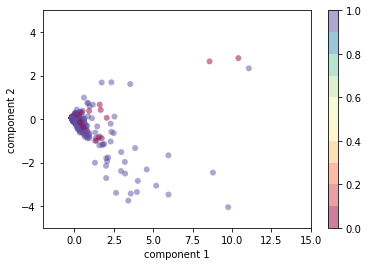

In [273]:
# run PCA analysis on days
pcap = PCA(n_components=2)
projected = pcap.fit_transform(data_new)
projected.shape

plt.scatter(projected[:, 0], projected[:, 1],
            c = tf_new, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlim(-2,15)
plt.ylim(-5,5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

(0.0, 3.0)

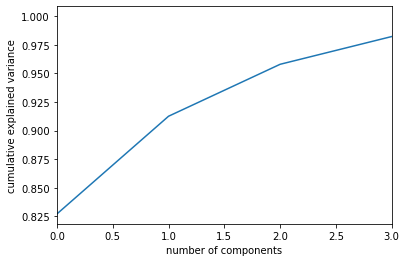

In [94]:
# run PCA analysis on days
from sklearn.decomposition import PCA
pca = PCA(2)  # project from 37 to 2 dimensions
projected = pca.fit_transform(data_new)
pca = PCA().fit(data_new)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.xlim(0,3)

(8365, 8365)


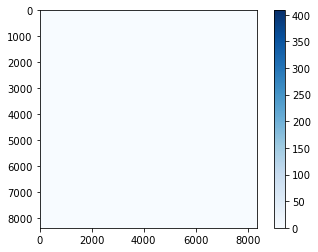

In [168]:
# create n x n pair-wise distance matrix for n bacteria
from sklearn.metrics import pairwise_distances
D_new = pairwise_distances(data_new)
print(D_new.shape)
plt.imshow(D_new, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar()

In [123]:
# reduce the dimension of days, use all of the data points labeled Bacteroidetes and Firmicutes
# takes too long to run because it requires the use of an 8000 x 8000 matrix

# from sklearn.manifold import MDS
# model = MDS(n_components=2, random_state=10)
# outS = model.fit_transform(data_new) # takes too long to run --> produces an 8000 x 2 matrix
# plt.scatter(outS[:, 0], outS[:, 1], c = tf_new, edgecolor = 'none', alpha = 0.5,cmap=plt.cm.get_cmap('Spectral', 10))
# plt.axis('equal')

In [417]:
# choose 100 data points, 50 from Bacteroidetes and 50 from Firmicutes
bact_index = []
firm_index = []
for i in range(len(target_new)):
    if target_new[i] == 0:
        bact_index.append(i)
    else:
        firm_index.append(i)

print(len(bact_index))
print(len(firm_index))
bact_index_50 = np.random.choice(bact_index, 50)
firm_index_50 = np.random.choice(firm_index, 50)
print(bact_index_50)
print(firm_index_50)
index_100 = [*bact_index_50, *firm_index_50]
print(index_100)

target_100 = target_new[index_100]
data_100 = data_new[index_100,:]

tf_100 = target_100.flatten()
tf_100.astype(int)

print(target_100.shape)
print(data_100.shape)
data_100 = data_100/np.sum(data_100, axis=0)

1
42
[18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18
 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18
 18 18]
[10 41 23 13  5  5 16 38 35 21  0 14 27 34 29 14  6 41 14 20  6  7 24  5
 11 14 23  9 23 30  1 39 32 11  5 37 34  9 16  5 20 16 42 42 27 14 21 12
 36 16]
[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 10, 41, 23, 13, 5, 5, 16, 38, 35, 21, 0, 14, 27, 34, 29, 14, 6, 41, 14, 20, 6, 7, 24, 5, 11, 14, 23, 9, 23, 30, 1, 39, 32, 11, 5, 37, 34, 9, 16, 5, 20, 16, 42, 42, 27, 14, 21, 12, 36, 16]
(100, 1)
(100, 37)


(100, 100)


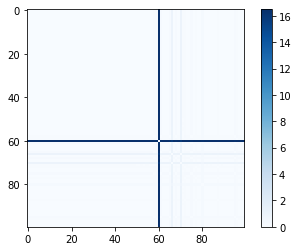

In [418]:
from sklearn.metrics import pairwise_distances
D_100 = pairwise_distances(data_100)
print(D_100.shape)
plt.imshow(D_100, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar()

(-0.5, 0.5)

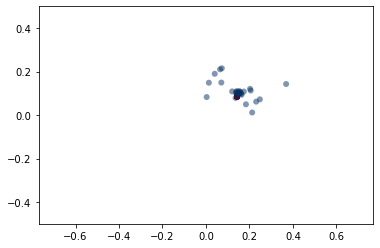

In [433]:
# reduce dimension of days, but only use 100 data points
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=10)
outS = model.fit_transform(D_100) # only requires a 100 x 100 matrix
plt.scatter(outS[:, 0], outS[:, 1], c = tf_100, edgecolor = 'none', alpha = 0.5, cmap = 'RdBu',label=tf_100)
plt.axis('equal')
# plt.legend([])
plt.xlim(-0.5,0.5)
plt.ylim(-0.5,0.5)

In [172]:
# use StandardScaler() on the whole data set 
scalerd = StandardScaler()
scalerd.fit(data)
print(scalerd.mean_)
data = scalerd.transform(data)
print(data)

[ 4.11527126e-19 -2.05763563e-19 -1.27573409e-17  3.29221701e-18
 -2.88068988e-18 -4.93832551e-18 -4.52679839e-18 -1.37861587e-17
 -1.74899029e-18 -1.09054688e-17  8.23054252e-19 -1.44034494e-17
 -1.81071935e-17 -9.46512390e-18 -1.33746316e-18 -1.23458138e-18
  1.44034494e-18 -2.46916276e-18 -4.93832551e-18 -1.76956664e-17
  6.17290689e-19  2.26339919e-18 -3.29221701e-18 -4.11527126e-18
 -4.11527126e-19  2.88068988e-18 -2.05763563e-19  6.99596114e-18
  1.23458138e-18 -8.23054252e-19 -4.93832551e-18 -1.23458138e-18
  1.54322672e-17  0.00000000e+00  7.61325183e-18 -3.70374413e-18
  1.23458138e-18]
[[ 5.42679508e+01  8.85995087e+01  5.84536119e+01 ...  2.43655592e+01
   7.45517888e+01  6.75818657e+01]
 [ 7.50374815e+01  2.72566664e+01  7.17367921e+01 ...  4.02323755e+00
   2.01126654e+01  5.18967227e+01]
 [ 5.51940731e+00  1.46437364e+00  4.40314402e+00 ...  9.48295096e-02
   4.82961716e+00  2.59093698e+01]
 ...
 [-1.95850703e-02 -1.76616198e-02 -1.99824898e-02 ... -2.47307352e-02
  -3.12

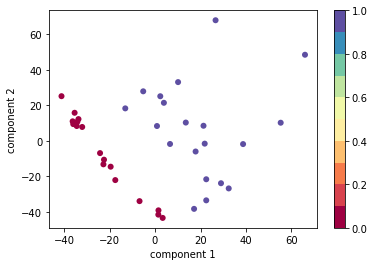

In [251]:
# run PCA analysis on bacteria
projected = pcap.fit_transform(data.T)
projected.shape

plt.scatter(projected[:, 0], projected[:, 1], c = tf, edgecolor='none', alpha=1,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

(0.0, 5.0)

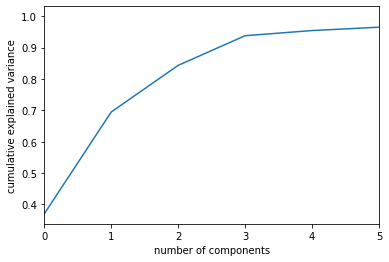

In [174]:
# run PCA analysis on bacteria
pca = PCA(2)  # project from 8000 to 2 dimensions
projected = pca.fit_transform(data.T) 
pca = PCA().fit(data.T)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.xlim(0,5)

In [175]:
# when reducing dimensions of bacteria, labels are now high/low fat
target = file['osc1a_diets']
print(target.shape)
target[target == 'LFPP'] = 0
target[target == 'HFHS'] = 1
tf = target.flatten()
tf.astype(int)

(37, 1)


array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

(37, 37)


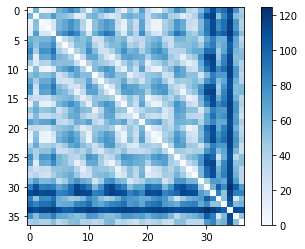

In [176]:
from sklearn.metrics import pairwise_distances
D_T = pairwise_distances(data.T)
print(D_T.shape)
plt.imshow(D_T, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar()

(-51.655221838033654,
 83.00634315506373,
 -60.754280717100784,
 112.0150231365469)

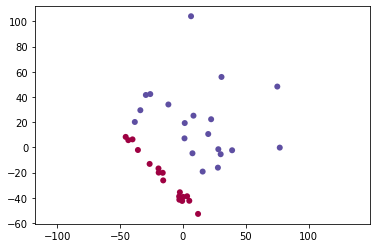

In [250]:
# reduce dimension of bacteria
model = MDS(n_components=2, dissimilarity='precomputed', random_state=10)
outS = model.fit_transform(D_T)
plt.scatter(outS[:, 0], outS[:, 1], c = tf, edgecolor = 'none', alpha = 1, cmap=plt.cm.get_cmap('Spectral', 10))
plt.axis('equal')

/Users/josephfichera/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_locally_linear.py:436: RuntimeWarning: divide by zero encountered in true_divide
  tmp[:, :nev] /= evals + reg[:, None]
/Users/josephfichera/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_locally_linear.py:446: RuntimeWarning: invalid value encountered in true_divide
  rho = evals[:, n_components:].sum(1) / evals[:, :n_components].sum(1)
/Users/josephfichera/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_locally_linear.py:454: RuntimeWarning: invalid value encountered in true_divide
  eta_range = evals_cumsum[:, -1:] / evals_cumsum[:, :-1] - 1
/Users/josephfichera/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_locally_linear.py:467: RuntimeWarning: invalid value encountered in double_scalars
  alpha_i = np.linalg.norm(Vi.sum(0)) / np.sqrt(s_i)


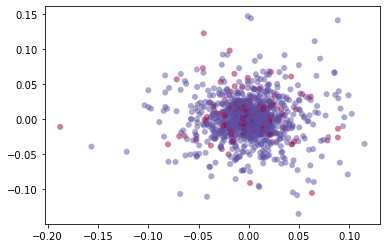

In [241]:
# reduces dimensions of days, produces 8000 x 2 matrix
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=10, n_components=2, method='modified',
                               eigen_solver='dense')
out = model.fit_transform(data_new) # 8000 x 2, reduces dimension of days

fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], c = tf_new, edgecolor = 'none', alpha = 0.5, cmap=plt.cm.get_cmap('Spectral', 10))
# ax.set_ylim(0.15, -0.15);

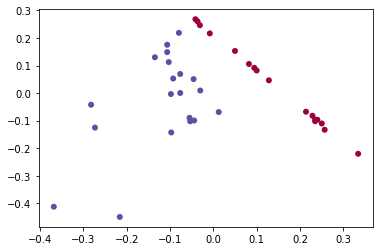

In [249]:
# reduces dimensions of bacteria, produces 37 x 2 matrix
model = LocallyLinearEmbedding(n_neighbors=10, n_components=2, method='modified',
                               eigen_solver='dense')
out = model.fit_transform(data.T) # reduces dimension of bacteria

fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], c = tf, edgecolor = 'none', alpha = 1, cmap=plt.cm.get_cmap('Spectral', 10))
# ax.set_ylim(0.15, -0.15);

In [243]:
# reduces dimension of days, produces 8000 x 2 matrix 
# takes too long to run because it requires the use of a very large matrix

# from sklearn.manifold import Isomap
# model = Isomap(n_components=2)
# outS = model.fit_transform(data_new)
# plt.scatter(outS[:, 0], outS[:, 1], c = tf_new, edgecolor = 'none', alpha = 0.5,cmap=plt.cm.get_cmap('Spectral', 10))
# plt.axis('equal')

(-50.0, 50.0)

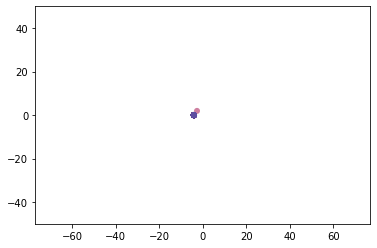

In [248]:
# choose 100 random data points, reduce dimension of days
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
outS = model.fit_transform(data_100) # 100 x 2, reduces dimension of days
plt.scatter(outS[:, 0], outS[:, 1], c = tf_100, edgecolor = 'none', alpha = 0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.axis('equal')
plt.xlim(-50,50)
plt.ylim(-50,50)

(-81.92814246232457, 142.1715857645687, -72.7523687439043, 110.95686858788375)

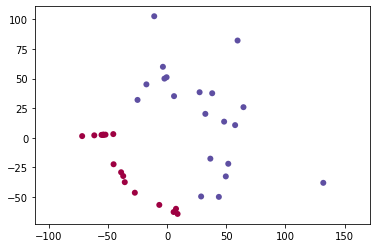

In [246]:
# reduces dimensions of bacteria, produces 37 x 2 matrix
model = Isomap(n_components=2)
outS = model.fit_transform(data.T) # 37 x 2, reduces dimension of bacteria
plt.scatter(outS[:, 0], outS[:, 1], c = tf, edgecolor = 'none', alpha = 1, cmap=plt.cm.get_cmap('Spectral', 10))
plt.axis('equal')

In [404]:
# Let's try labels of another taxonomy instead of phylla
# target = file['ptax']
target = file['ctax']
# target = file['otax']
# target = file['ftax']
# target = file['gtax']
unique = np.unique(target)
print(len(unique))
print(unique)

42
[array(['Acetothermia_genera_incertae_sedis'], dtype='<U34')
 array(['Acidobacteria_Gp1'], dtype='<U17')
 array(['Acidobacteria_Gp21'], dtype='<U18')
 array(['Acidobacteria_Gp3'], dtype='<U17')
 array(['Actinobacteria'], dtype='<U14')
 array(['Alphaproteobacteria'], dtype='<U19')
 array(['Aminicenantes_genera_incertae_sedis'], dtype='<U35')
 array(['Anaerolineae'], dtype='<U12') array(['Aquificae'], dtype='<U9')
 array(['Ardenticatenia'], dtype='<U14') array(['Bacilli'], dtype='<U7')
 array(['Bacteroidetes_incertae_sedis'], dtype='<U28')
 array(['Bacteroidia'], dtype='<U11')
 array(['Betaproteobacteria'], dtype='<U18')
 array(['Caldisericia'], dtype='<U12')
 array(['Candidatus Hydrogenedens'], dtype='<U24')
 array(['Chlamydiia'], dtype='<U10') array(['Chlorobia'], dtype='<U9')
 array(['Chloroplast'], dtype='<U11') array(['Clostridia'], dtype='<U10')
 array(['Cytophagia'], dtype='<U10')
 array(['Deferribacteres'], dtype='<U15')
 array(['Dehalococcoidia'], dtype='<U15')
 array(['Deino

In [450]:
features = np.random.choice(unique, 2)
feature_1 = ''.join(features[0])
feature_2 = ''.join(features[1])
print(feature_1)
print(feature_2)

index = []
for i in range(len(target)):
    if target[i] == feature_1:
        index.append(i)
    if target[i] == feature_2:
        index.append(i)
print(len(index))

# print(index)
# target_new = np.delete(target, index, 0)
target_new = target[index]
target_new[target_new == str(feature_1)] = 0
target_new[target_new == str(feature_2)] = 1
print(target_new)
tf_new = target_new.flatten()
# tf_new.astype(int)

data_new = data[index]
print(data_new.shape)

Caldisericia
Woesearchaeota Incertae Sedis AR18
7
[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]]
(7, 37)


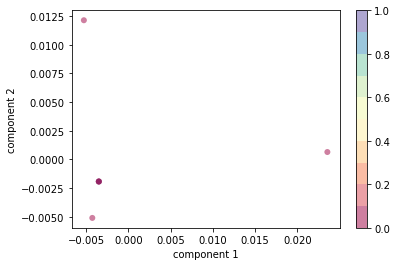

In [451]:
# run PCA analysis on days
pcap = PCA(n_components=2)
projected = pcap.fit_transform(data_new)
projected.shape

plt.scatter(projected[:, 0], projected[:, 1],
            c = tf_new, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
# plt.xlim(-2,15)
# plt.ylim(-5,5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

(0.0, 3.0)

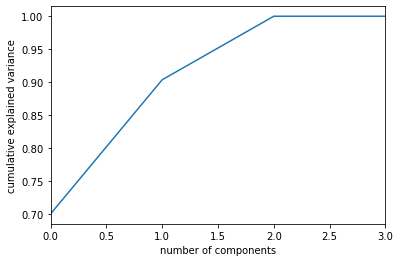

In [452]:
# run PCA analysis on days
from sklearn.decomposition import PCA
pca = PCA(2)  # project from 37 to 2 dimensions
projected = pca.fit_transform(data_new)
pca = PCA().fit(data_new)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.xlim(0,3)

(-0.01051965291776758,
 0.019090412126428546,
 -0.013047034048215911,
 0.01677456357451744)

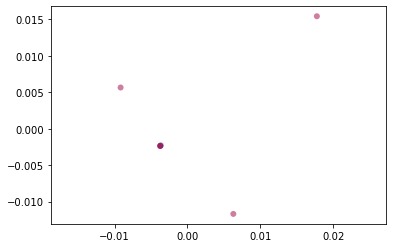

In [453]:
from sklearn.manifold import MDS
model = MDS(n_components=2, random_state=10)
outS = model.fit_transform(data_new)
plt.scatter(outS[:, 0], outS[:, 1], c = tf_new, edgecolor = 'none', alpha = 0.5,cmap=plt.cm.get_cmap('Spectral', 10))
plt.axis('equal')
# plt.xlim(-5,5)
# plt.ylim(-5,5)

/Users/josephfichera/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_locally_linear.py:467: RuntimeWarning: invalid value encountered in double_scalars
  alpha_i = np.linalg.norm(Vi.sum(0)) / np.sqrt(s_i)


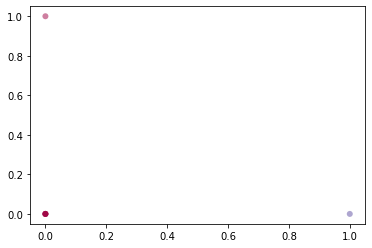

In [455]:
# reduces dimensions of days, produces 8000 x 2 matrix
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=5, n_components=2, method='modified',
                               eigen_solver='dense')
out = model.fit_transform(data_new) # 8000 x 2, reduces dimension of days

fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], c = tf_new, edgecolor = 'none', alpha = 0.5, cmap=plt.cm.get_cmap('Spectral', 10))
# ax.set_xlim(-0.05,0.05)

(-0.0186281492389388,
 0.02766611179824321,
 -0.0024872097103855765,
 0.009798031413824085)

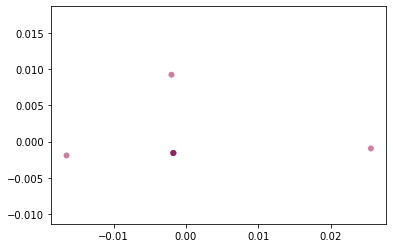

In [456]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
outS = model.fit_transform(data_new) # 100 x 2, reduces dimension of days
plt.scatter(outS[:, 0], outS[:, 1], c = tf_new, edgecolor = 'none', alpha = 0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.axis('equal')
# plt.xlim(-50,50)
# plt.ylim(-50,50)